<h1><center>Laboratorio 3: Clasificación y Clustering 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamín Tejeda
- Nombre de alumno 2: Constanza Peña


### **Link de repositorio de GitHub:** `https://github.com/constanzaps/laboratorios_LDS`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Manejo de DataFrames con la libreria `pandas`.
- Exploración del dataset y los resultados a través de visualizaciones interactivas usando `plotly`.
- Clasificación en `scikit-learn`
- Uso de pipelines.

## Reglas:

- Fecha de entrega: 4/06/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas`.
- Utilizar `plotly` para obtener información gráfica del dataset.
- Aplicar las ventajas que nos ofrece crear un pipeline.
- Visualizar el funcionamiento de clasificadores.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier


# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


# Proyecciones en baja dimensionalidad: UMAP
!pip install umap-learn

     |████████████████████████████████| 13.2MB 292kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 24.7MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=f555e579fc2e6c6a584774384838cec84ad90f84c4e00cda825e19991ab8cbe2
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=911a81f00b1d2c0db3f64c4f6a002f85605dfb1d5acb90b476ba01b153a9bbbc
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


# 1. Predicciones futboleras.

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

Para este laboratorio se deberá trabajar con los csv ```FullData.csv```, donde deberán aplicar algoritmos de Clustering y clasificación información relevante de jugadores de futbol.

Para comenzar cargue el dataset señalado y visualice a traves de un head los atributos que posee el dataset.

In [2]:
# Usar solamente si utilizan Collab.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
dir = '/content/drive/MyDrive/LDS/Lab 3/'
df_players = pd.read_csv(dir+'stats_players.csv')
df_players.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185 cm,80 kg,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170 cm,72 kg,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174 cm,68 kg,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182 cm,85 kg,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193 cm,92 kg,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11


De la tabla se reconoce:

1. `Name`: Nombre del jugador
2. `Nationality`: Nacionalidad del jugador
3. `National_Position`: Posición en la selección, este valor solo existe cuando el jugador es seleccionado nacional.
4. `Club_Position`: Posición del jugador. Este parámetro tiene valor en gran parte de los jugadores, existen casos como `Res` o `Sub` que no los deberá considerar en la respectiva sección.
5. `Height`: Altura del jugador en centímetros. Si nota esta variable tiene un string, transforme a int.
6. `Weight`: Peso del jugador en kilogramos. Si nota esta variable tiene un string, transforme a int.
7. `Preffered_Foot`: Pie con que prefiere patear.
8. `Age`: Edad
9. `Work_Rate`: Frecuencia con que trabaja.

Mientras que el resto de las características representan estadísticas personales (de acuerdo a la habilidad) para cada uno de los jugadores.


## 1.1 Predicción de seleccionados nacionales. (2 puntos)

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


### 1.1.1 Generación de Labels para la Clasificación

Tras el trágico despido de la mítica mascota de la población de Maipú, *Renacín*, decide adentrarse en la predicción futbolera. Para esto, utilizando los datos cargados en las celdas anteriores, le consulta si es posible predecir **si un jugador de football será seleccionado nacional en base a sus estadísticas**

En este primer experimento de clasificación comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. Hecho esto, ¿Como se distribuyen los datos para cada clase?, comente lo que observa.


In [4]:
df_players['Seleccionado'] = df_players['National_Position'].fillna(0)
df_players.loc[df_players.Seleccionado != 0, "Seleccionado"] = 1

In [5]:
df_players["Height"] = df_players["Height"].str.replace("\scm", "")
df_players["Height"] = df_players["Height"].astype(int)
df_players["Weight"] = df_players["Weight"].str.replace("\skg", "")
df_players["Weight"] = df_players["Weight"].astype(int)

In [6]:
print(f"Cantidad de datos etiquetados como seleccionados (1): {(df_players.Seleccionado == 1).sum()}")
print(f"Cantidad de datos etiquetados como no-seleccionados (0): {(df_players.Seleccionado == 0).sum()}")

Cantidad de datos etiquetados como seleccionados (1): 1075
Cantidad de datos etiquetados como no-seleccionados (0): 16513


In [7]:
df_players.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,1


COMENTAR

### 1.1.2 Camino a la Clasificación

<p align="center">
  <img src="http://vignette3.wikia.nocookie.net/inciclopedia/images/c/cd/Patada_Medel_Messi.gif/revision/latest?cb=20150705215005" width="300">
</p>



Si bien los atributos de interés se encuentran en su mayoría limpios, existen valores mal ingresados al `DataFrame`. Para esto: 

1. Transforme a enteros todos los valores numéricos de la tabla que considere pertinentes. Por ejemplo: El peso aparece como strings y además estos continene la unidad. En este caso, debería transformar estos valores a enteros. Puede usar directamente funciones sobre el DataFrame (como `apply`) o el submódulo de las Series `str`.
2. Luego, aplique un ```ColumnTransformer``` para pre-procesar los datos del DataFrame de la siguiente forma:

Aplicar ```OneHotEncoder()``` sobre los atributos:

```python
['Preffered_Foot', 'Work_Rate']
```

Aplicar ```MinMaxScaler()``` sobre los atributos:

```python
['Age']
```

Aplicar ```StandardScaler()``` sobre los atributos:

```python
['Height', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions','Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']
```

**Nota 2**: Puede copiar/pegar directamente las columnas en el `ColumnTransformer`.


Hecho lo anterior, defina al menos 3 pipelines para la clasificación donde anexe las transformaciones señaladas variando entre cada pipeline solo los clasificadores (puede escoger cualquiera de los clasificadores vistos en clases).

**To-Do:**

- [ ] Modificar valores mal ingresados.
- [ ] Aplicar ```ColumnTransformer``` sobre los datos a través de un pipeline.
- [ ] Crear 3 pipelines con diferentes clasificadores.
- [ ] No entrenar los datos aún.

**Nota:** No es necesario entrenar los clasificadores aún.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(),  ['Preffered_Foot', 'Work_Rate']),
        ('scaler', MinMaxScaler(),['Age']), 
        ('StandardScaler', StandardScaler(),['Height', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 
                                             'Reactions','Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina',
                                             'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                                             'Freekick_Accuracy', 'Penalties', 'Volleys'])])

pipel_1 = Pipeline([('prepro', preprocessing_transformer),
                         ('DecisionTree', DecisionTreeClassifier(criterion='entropy'))])

pipel_2 = Pipeline([('prepro', preprocessing_transformer),
                         ('LogisticRegression', LogisticRegression())])

pipel_3 = Pipeline([('prepro', preprocessing_transformer),
                         ('SVC', SVC())])


#LogisticRegression(X,j)
#pipel_1.fit(X, y) mas abajo cuando entrenemos hayq ue hacer split

### 1.1.3 Métricas de evaluación + Opcional

<p align="center">
  <img src="https://media4.giphy.com/media/3orif8r5vpbAdQU3iU/200w.gif?cid=82a1493btc1h43n1h4c59p13kjv6adugso4lo4292zbgt66b&rid=200w.gif&ct=g" width="300">
</p>

Interesado por saber que tan bien funciona su clasificador, Renacin le solicita que construya **a mano** las siguientes métricas de evaluación para el caso de **clasificación binaria**:

- Accuracy (Exactitud):

$$Accuracy = \dfrac{número \, de \, predicciones \, correctas}{número \, de \,predicciones \, totales}$$


- Precision: 

$$Precision = \dfrac{Verdaderos \, positivos}{Verdaderos \, positivos + Falsos \, positivos}$$

- Recall:

$$Recall = \dfrac{Verdaderos \, positivos}{Verdaderos \, positivos + Falsos \,negativos}$$

<p align="center">
  <img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm" width="350">
</p>

**To-Do:**

- [ ] Crear funciones para las métricas para clasificación binaria: Accuracy, Precision y Recall. 
- [ ] Compruebe el correcto funcionamiento de sus métricas a través de los test.

**Hint:** Utilice confusion_matrix para obtener TP, FP, FN y TN.



In [11]:
def accuracy(y_true, y_pred):
  matriz = confusion_matrix(y_true,y_pred)
  return (matriz[0,0]+matriz[1,1])/matriz.sum()

def precision(y_true, y_pred):
  matriz = confusion_matrix(y_true,y_pred)
  return matriz[1,1]/(matriz[1,1] + matriz[1,0])

def recall(y_true, y_pred):
  matriz = confusion_matrix(y_true,y_pred)
  return matriz[1,1]/(matriz[1,1] + matriz[0,1])

In [12]:
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 1]

# Tests de metricas
assert accuracy_score(y_true, y_pred) == accuracy(y_true, y_pred)
assert recall_score(y_true, y_pred) == recall(y_true, y_pred)
assert precision_score(y_true, y_pred) == precision(y_true, y_pred)

### 1.1.4 Entrenemos los pipelines

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="300">
</p>


Entrene en base al pipeline generado en los pasos anteriores, procure separar los datos de entrenamiento en un conjunto de entrenamiento y de prueba (la proporción queda a su juicio). Una vez entrenado, muestre los resultados para cada uno de los clasificadores y comente lo que observa de los resultados obtenidos usando las métricas creadas anteriormente, ¿podrían mejorarse los resultados?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar el pipeline.
- [ ] Utilizar las métricas codificadas anteriormente y analizar los resultados.


In [13]:
X= df_players.loc[:, ~df_players.columns.isin(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Seleccionado','Weight'])]
y= df_players["Seleccionado"]
y=y.astype('int')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=12)

In [15]:
pipel_1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

In [16]:
pipel_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

In [17]:
pipel_3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

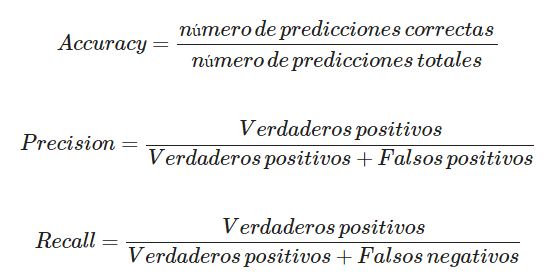

array([[4956,    0],
       [ 321,    0]])

In [19]:
print("Medidas para pipeline 1:")
print(accuracy(y_test,pipel_1.predict(X_test)))
print(recall(y_test,pipel_1.predict(X_test)))
print(precision(y_test,pipel_1.predict(X_test)))

Medidas para pipeline 1:
0.8984271366306613
0.19718309859154928
0.21806853582554517


In [20]:
print("Medidas para pipeline 2:")
print(accuracy(y_test,pipel_2.predict(X_test)))
print(recall(y_test,pipel_2.predict(X_test)))
print(precision(y_test,pipel_2.predict(X_test)))

Medidas para pipeline 2:
0.9401174909986735
0.6666666666666666
0.03115264797507788


In [21]:
print("Medidas para pipeline 3:")
print(accuracy(y_test,pipel_3.predict(X_test)))
print(recall(y_test,pipel_3.predict(X_test)))
print(precision(y_test,pipel_3.predict(X_test)))

Medidas para pipeline 3:
0.939169982944855


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


nan
0.0


**Respuesta**:

```
Se puede observar que las mejores métricas de evaluación se obtienen en el segundo modelo, que utiliza Logistic Regression. 

Evaluamos principalmente en base a accuracy, pues no sabemos la importancia relativa de los falsos positivos y negativos, 
en caso de no ser seleccionado.
 
Además llama la atención que el último modelo (SVC) el recall no se puede calcular ya que entrega 0 verdaderos positivos y 0 falsos positivos,
 causando una división en 0. Además el precision da un resultado de 0 al obtenerse 0 verdaderos positivos. 
 Esto se puede comprobar en la matriz de confusión de más abajo. 
 
 ```

In [22]:
confusion_matrix(y_test.tolist(),pipel_3.predict(X_test))

array([[4956,    0],
       [ 321,    0]])

La matriz de confusión de scikit-learn tiene la siguiente convensión:

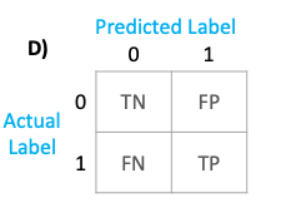

## 1.2 Predicción de posiciones de jugadores. (2 puntos)

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

### 1.2.1 Creación de nuevas labels.



No conforme con el trabajo de la sección 1.1, Renacin les *ordena* que construyan un clasificador nuevo, pero para predecir la posición de los jugadores del dataset. Para lograr esto, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, con esto les recalca que no deben utilizar los valores ```Sub``` y ```Res``` de este atributo, pidiendo que agrupen los valores en los siguientes grupos:

```python
Ataque=['ST', 'CAM','RS','LF','LAM','LS','RF','RAM','CF']
MedioCampistas=['RCM','LW', 'RW', 'LCM','LM', 'RM', 'CM']
Defensas=['LCB','RB','RCB', 'LDM','LB','CDM','RDM','CB','RWB','LWB']
Arquero =['GK']
```

Con lo señalado, Renacin les señala que no deberian utilizar el label utilizado en la sección 1.1, ya que el problema de clasificación ahora es de posiciones.

**To-Do**:

- [ ] Aplique las etiquetas de ```Ataque```, ```MedioCampista```, ```Defensa``` y ```Arquero``` en los valores señalados en esta sección.
- [ ] Muestre como se distribuyen los datos etiquetados.

In [26]:
Ataque=['ST', 'CAM','RS','LF','LAM','LS','RF','RAM','CF']
MedioCampistas=['RCM','LW', 'RW', 'LCM','LM', 'RM', 'CM']
Defensas=['LCB','RB','RCB', 'LDM','LB','CDM','RDM','CB','RWB','LWB']
Arquero =['GK']

In [27]:
df_players.loc[df_players.Club_Position.isin(Ataque), "Position"] = "Delantero" 
df_players.loc[df_players.Club_Position.isin(MedioCampistas), "Position"] = "Medio" 
df_players.loc[df_players.Club_Position.isin(Defensas), "Position"] = "Defensa" 
df_players.loc[df_players.Club_Position.isin(Arquero), "Position"] = "Arquero" 

In [28]:
df_players=df_players.dropna(subset=["Position"])

In [35]:
print(f"Cantidad de datos etiquetados como delantero: {(df_players.Position == 'Delantero').sum()}")
print(f"Cantidad de datos etiquetados como defensa: {(df_players.Position == 'Defensa').sum()}")
print(f"Cantidad de datos etiquetados como medio campistas: {(df_players.Position == 'Medio').sum()}")
print(f"Cantidad de datos etiquetados como arqueros: {(df_players.Position == 'Arquero').sum()}")

Cantidad de datos etiquetados como delantero: 1252
Cantidad de datos etiquetados como defensa: 3185
Cantidad de datos etiquetados como medio campistas: 1880
Cantidad de datos etiquetados como arqueros: 632


### 1.2.2 Entrenar un pipeline

Aplicando el mismo preprocesamiento solicitado en 1.1.2, genere un pipeline con un clasificador a gusto y evalúe al modelo de clasificación utilizando la **librería `scikit-learn`** (esto debido a que este es un problema multi clase y las funciones solicitadas anteriormente era para una clasificación binaria).

De los resultados obtenidos, ¿El modelo pudo clasificar mejor este problema o el de la sección 1.1?, Comente sus resultados.

**To-Do**:

- [ ] Genere un pipeline similar al visto en la sección 1.1.2.
- [ ] Aplique las métricas ofrecidas por la librería scikit-learn.
- [ ] Responda la pregunta del enunciado.

In [36]:
X= df_players.loc[:, ~df_players.columns.isin(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Seleccionado','Weight'])]
y= df_players["Position"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=12)

In [37]:
pipel_multi = Pipeline([('prepro', preprocessing_transformer),
                         ('Multi-Logis', OneVsRestClassifier(LogisticRegression()))])

In [38]:
pipel_multi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

In [40]:
from sklearn.metrics import classification_report

#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pipel_multi.predict(X_test)))

              precision    recall  f1-score   support

     Arquero       1.00      1.00      1.00       186
     Defensa       0.86      0.95      0.90       956
   Delantero       0.78      0.63      0.70       374
       Medio       0.66      0.63      0.64       569

    accuracy                           0.81      2085
   macro avg       0.82      0.80      0.81      2085
weighted avg       0.80      0.81      0.80      2085



In [41]:
confusion_matrix(y_test.tolist(),pipel_multi.predict(X_test))

array([[186,   0,   0,   0],
       [  0, 906,   1,  49],
       [  0,   7, 235, 132],
       [  0, 146,  66, 357]])

**Respuesta**:

```

¿El modelo pudo clasificar mejor este problema o el de la sección 1.1?

Este modelo tiene un rendimeinto un poco más bajo en base al accuracy, donde el de la sección 1.1 era de 0.94, y el del multiclase es de 0.81.

Además se puede ver, en la matriz de confusión, que el resultado para arqueros es muy bueno, prediciendo correctamente a todos.

Finalmente se ve que al aumentar la complejidad disminuye el rendimiento del algoritmo, lo cual es esperable ya que los jugadores de futbol 
a pesar de tener diferentes posiciones pueden tener atributos muy similares (por ejemplo, medio campistas que son muy defensivos).
```

## 1.3 Clustering Sobre el Dataset (2 puntos)

<p align="center">
  <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1832816%2F349289c622faaff3afc517a46fcf4c71%2Fk-means.jpg?generation=1577258176400530&alt=media" width="200">
</p>

### 1.3.1 Elección de numero de clusters

<p align="center">
  <img src="https://media1.tenor.com/images/a85e9df2f5784d6513dce853ba9d5755/tenor.gif?itemid=18229271" width="200">
</p>





Entrene un k-means con 3, 4 y 5 clusters. ¿Las agrupaciones son lógicas usando un análisis visual?, Grafique los clusters con el código dispuesto más abajo y comente cual de las opciones presenta una mejor agrupación.

En base al análisis realizado, ubique la posición de los cluster en la cancha. Solo señale a que posición equivaldría tomando de referencia:

- Ataque
- Medio campistas
- Defensas
- Arquero 

**To-Do**:

- [ ] Escoger un numero de cluster y justificar elección.
- [ ] Comentar si las agrupaciones son lógicas a través de un análisis visual.
- [ ] Graficar los resultados obtenidos y visualizar las agrupaciones obtenidas.


In [ ]:
from sklearn.cluster import KMeans

pipel_knn3 = Pipeline([('prepro', preprocessing_transformer),
                         ('Kmeans3', KMeans(n_clusters=3, random_state=0))])

pipel_knn4 = Pipeline([('prepro', preprocessing_transformer),
                         ('Kmeans4', KMeans(n_clusters=4, random_state=0))])

pipel_knn5 = Pipeline([('prepro', preprocessing_transformer),
                         ('Kmeans5', KMeans(n_clusters=5, random_state=0))])

In [ ]:
X= df_players.loc[:, ~df_players.columns.isin(['Position','Name', 'Nationality', 'National_Position', 'Club_Position', 'Seleccionado','Weight'])]

Vamos a entrenar los pipeline

In [ ]:
pipel_knn3.fit(X)

Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

In [ ]:
pipel_knn4.fit(X)

Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

In [ ]:
pipel_knn5.fit(X)

Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
            

In [ ]:
# Centroides calculados.
pipel_knn3['Kmeans3'].cluster_centers_

In [ ]:
pipel_knn3['Kmeans3'].labels_

In [ ]:
from umap import UMAP

def graficar_clusters(clusters, preprocessed_data,posicion = df_players.Position.values):
  # Entreguele a esta función solo los clusters, el resto de parametros debería funcionar por default.
  umap = UMAP()
  projections = umap.fit_transform(preprocessed_data)
  fig = px.scatter(x=projections[:,0], y=projections[:,1], color=clusters, hover_data={'posicion': posicion}) 
  fig.show()

In [ ]:
### Código aquí ###
graficar_clusters(pipel_knn3['Kmeans3'].labels_,pipel_knn3.fit_transform(X))

In [ ]:
graficar_clusters(pipel_knn4['Kmeans4'].labels_,pipel_knn4.fit_transform(X))

In [ ]:
graficar_clusters(pipel_knn5['Kmeans5'].labels_,pipel_knn5.fit_transform(X))

**Respuesta**:

```
Se decide graficar las 3 propuestas de número de clusters, 3,4 y 5, para poder comparar. 

En todas las clasificaciones el grupo arqueros resulta notoriamente aislado de los demás, siendo el más fácil de diferenciar. Para el resto de posiciones, 
existe siempre un grupo muy marcado de defensas, sin embargo los demás clusters mezclan varias posiciones.

Creemos que el mejor cluster es el cuatro, donde se pueden visualizar 4 grupos. Un grupo de arqueros bien delimitado, un grupo de defensas, y otros dos grupos, 
que serían, el grupo azul mayoritariamente de defensas y medio campistas, y el amarillo de medio campistas y delanteros. 

Estas agrupaciones son  lógicas ya que los arqueros tienen atributos muy distintos a los jugadores de otras áreas, teniendo valores muy altos en los 
atributos específicos de arqueros. Y es esperable que existan grupos donde se comparten posiciones para los demás tipos de jugadores pues hay medio campistas 
con un estilo más defensivo (medios defensas) y también existen medio campistas con un estilo más de ataque. 


```

### 1.3.2 Búsqueda Número Óptimo de Clusters: Método del Codo **(Opcional 0.5 puntos)**

<p align="center">
  <img src="https://c.tenor.com/fk4p5HzTi5gAAAAC/elbow-high-five.gif" width="300">
</p>





Renancin muy indeciso de sus resultados le comenta que desea realizar un último trabajo. En esta última tarea le solicita la agrupación de los datos obtenidos en la sección 1.2 utilizando K-means. Para esto usted deberá visualizar a través del método del codo el número óptimo de agrupaciones para los datos. 

**Hint:** Revisar las clases y encontrar el código.

**To-Do**:

- [ ] Pre-procesar los datos con el mismo preprocesamiento aplicado en 1.2
- [ ] Utilizar el método del codo para obtener el número de clusters.

In [ ]:
x= pipel_knn3.fit_transform(X) # estos son los datos preprocesados

In [ ]:
intertias = [
    [i, KMeans(n_clusters=i, random_state=0).fit(x).inertia_]
    for i in range(1, 11)
]

intertias = pd.DataFrame(intertias, columns=["n° clusters", "inertia"])
intertias.head(3)

,n° clusters,inertia
0,1,139668.453631
1,2,56422.579345
2,3,31080.680905


In [ ]:
px.line(intertias, x="n° clusters", y="inertia", title="Método del Codo con K-Means")

**Respuesta**:

```
Se observa que el codo no es facilmente distingible, pero 3 y 4 son buenos candidatos.
A nuestro juicio 4 es el mejor valor ya que se pueden agrupar las posiciones del futbol en 4.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab, solo para tareas**. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>